In [1]:
install.packages('tidyverse')
#install.packages('ggpubr')
install.packages('cowplot')
install.packages("gridExtra")
library(tidyverse)
library(readr)
library(ggplot2)
library(gridExtra)
library(cowplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




# Ex.1

## 1) read the data and import them in a data.frame or tibble structure

In [2]:
american_airline_empl <- read_tsv(file='american_airline_empl.txt', show_col_types = F, col_types = 'i')
delta_airline_empl <- read_tsv(file='delta_airline_empl.txt', show_col_types = F, , col_types = 'i')
federal_express_empl <- read_tsv(file = 'federal_express_empl.txt', show_col_types = F, col_types = 'i')
united_airline_empl <- read_tsv(file = 'united_airline_empl.txt', show_col_types = F, col_types = 'i')

## 2) merge the four data tibble in a common tibble

In [3]:
merged_tibble <- american_airline_empl |>
    inner_join(delta_airline_empl, by=c('Year'='Year', 'Month'='Month')) |>
    inner_join(federal_express_empl, by=c('Year'='Year', 'Month'='Month')) |>
    inner_join(united_airline_empl, by=c('Year'='Year', 'Month'='Month'))
names(merged_tibble) = c('Month', 'Year', 'Full_time_america', 'Part_time_america', 'Grand_total_america', 'Full_time_delta', 'Part_time_delta', 'Grand_total_delta', 'Full_time_federal', 'Part_time_federal', 'Grand_total_federal', 'Full_time_united', 'Part_time_united', 'Grand_total_united' ) 
merged_tibble 

Month Year Full_time_america Part_time_america Grand_total_america
1    1    1990 68137              9039             77176              
2    2    1990 68725              9273             77998              
3    3    1990 69509              9376             78885              
4    4    1990 69713              9326             79039              
5    5    1990 70376              9309             79685              
6    6    1990 71258              9369             80627              
7    7    1990 72018              9651             81669              
8    8    1990 72513              9694             82207              
9    9    1990 72776              9788             82564              
10  10    1990 73111              9737             82848              
11  11    1990 73171              9492             82663              
12  12    1990 73726              9507             83233              
13   1    1991 73867              9426             83293              
14   2    1991 73490              9934             83424              
15   3    1991 73538             10192             83730              
16   4    1991 74075             10246             84321              
17   5    1991 74853             10427             85280              
18   6    1991 75683             10716             86399              
19   7    1991 76563             10876             87439              
20   8    1991 76887             11029             87916              
21   9    1991 82579             12560             95139              
22  10    1991 82722             12785             95507              
23  11    1991 83237             12293             95530              
24  12    1991 83561             12531             96092              
25   1    1992 83649             12361             96010              
26   2    1992 83428             12741             96169              
27   3    1992 83444             12644             96088              
28   4    1992 83514             12880             96394              
29   5    1992 83615             12747             96362              
30   6    1992 84149             12953             97102              
⋮   ⋮     ⋮    ⋮                 ⋮                 ⋮                  
368  8    2020 95312             11232             106544             
369  9    2020 95197             10973             106170             
370 10    2020 79281             11565              90846             
371 11    2020 78761             11613              90374             
372 12    2020 88418             12587             101005             
373  1    2021 87926             12483             100409             
374  2    2021 90255             11187             101442             
375  3    2021 90243             11060             101303             
376  4    2021 88211             10682              98893             
377  5    2021 86714             10951              97665             
378  6    2021 87718             11022              98740             
379  7    2021 88130             11023              99153             
380  8    2021 88345             10943              99288             
381  9    2021 86522             10968              97490             
382 10    2021 85979             11130              97109             
383 11    2021 86112             11414              97526             
384 12    2021 86324             11557              97881             
385  1    2022 87377             11823              99200             
386  2    2022 87999             12066             100065             
387  3    2022 89059             12453             101512             
388  4    2022 89379             12766             102145             
389  5    2022 90332             12814             103146             
390  6    2022 90598             12958             103556             
391  7    2022 90647             12944             103591             
392  8    2022 90399        

## 3) Produce a plot of the behaviour of the employees as a function of time for all four companies, separately for the number of full-time and part-time employees

### Full time 

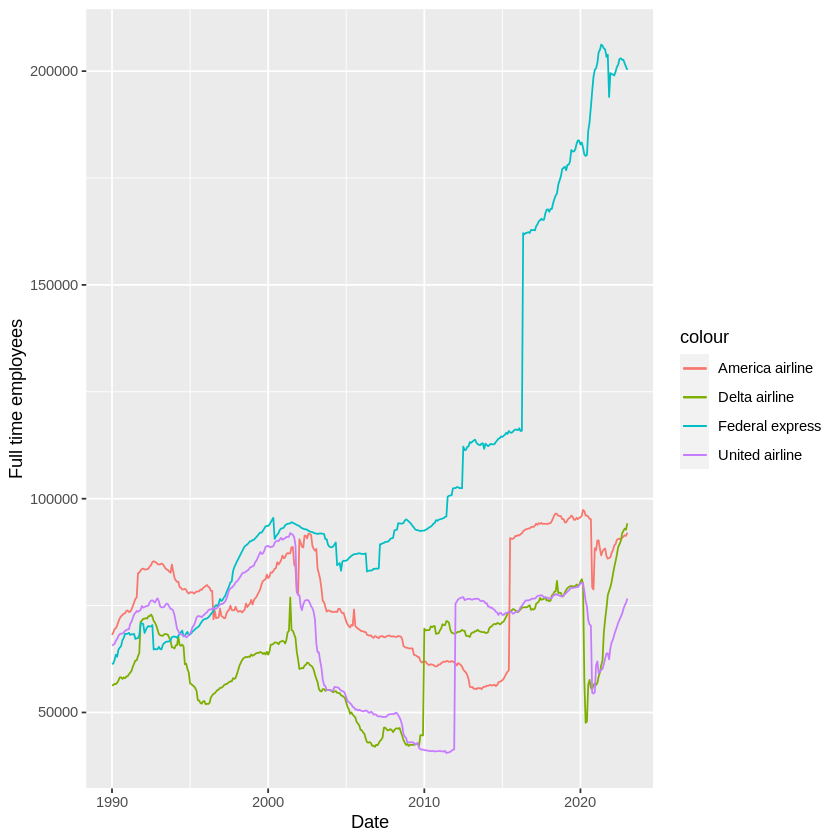

In [4]:

merged_tibble$Date <- paste(merged_tibble$Year, merged_tibble$Month, sep="-") |>
                    paste('-01', sep='') |>
                    as.Date()

#Since this is not a date due to the lack of 
#a %d in the column is added a 02 value which stands for the day, choosen to be the 2 but ininfluent

ggplot() + 
    geom_line(data = merged_tibble, aes(Date, y = Full_time_america, colour='America airline')) +
    geom_line(data = merged_tibble, aes(Date, y = Full_time_delta,   colour='Delta airline')) +
    geom_line(data = merged_tibble, aes(Date, y = Full_time_federal, colour='Federal express')) +
    geom_line(data = merged_tibble, aes(Date, y = Full_time_united, colour='United airline')) +
    xlab(label='Date') +
    ylab(label='Full time employees') 


### Part time

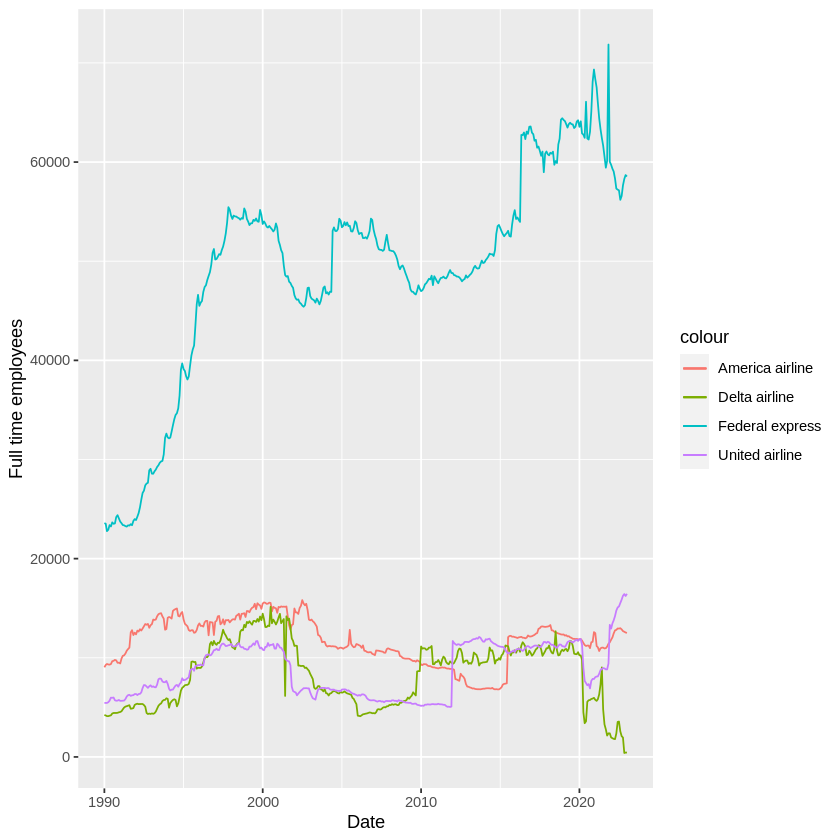

In [5]:
# Part time
merged_tibble|>
ggplot() +
    geom_line(aes(x=Date, y=Part_time_america, colour='America airline'))+
    geom_line(aes(x=Date, y=Part_time_delta, colour='Delta airline'))+
    geom_line(aes(x=Date, y=Part_time_federal, colour='Federal express'))+
    geom_line(aes(x=Date, y=Part_time_united, colour='United airline'))+ 
    xlab(label='Date') +
    ylab(label='Full time employees') 

## 4) when did each company reach the minimum and maximum number of employess ?

### Plot of the total employees

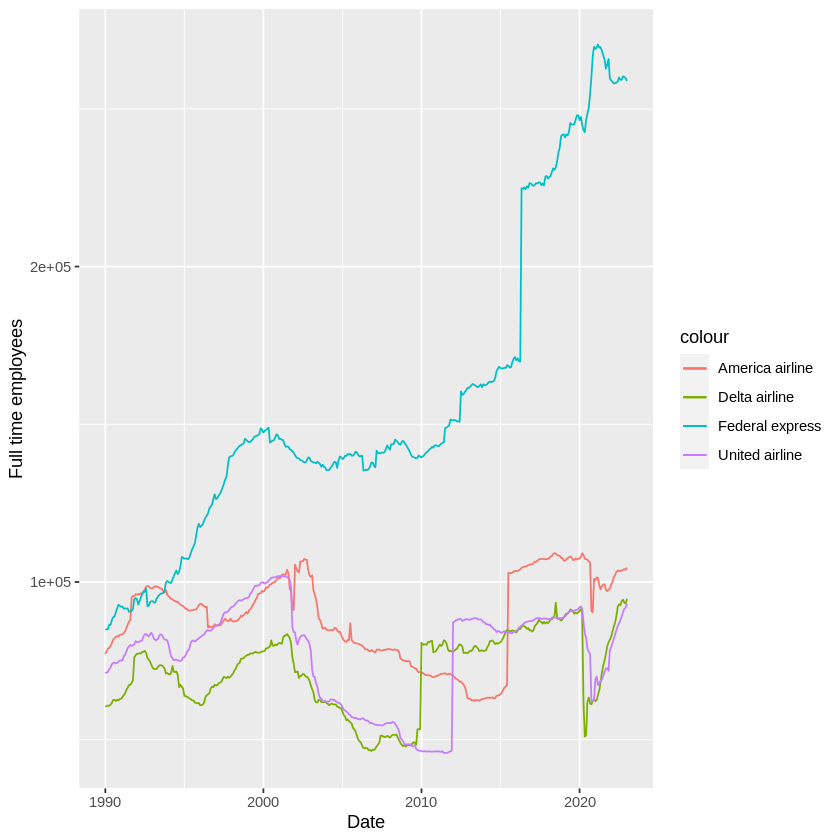

In [6]:
merged_tibble|>
ggplot() +
    geom_line(aes(x=Date, y=Grand_total_america, colour='America airline'))+
    geom_line(aes(x=Date, y=Grand_total_delta, colour='Delta airline'))+
    geom_line(aes(x=Date, y=Grand_total_federal, colour='Federal express'))+
    geom_line(aes(x=Date, y=Grand_total_united, colour='United airline'))+ 
    xlab(label='Date') +
    ylab(label='Full time employees') 

In [7]:
company_name <- c('America', 'Delta', 'Federal', 'United')
for (i in seq(5, 14, 3)){
    minimum_employees <- min(merged_tibble[,i]) 
    minimum_date <- filter(merged_tibble, merged_tibble[,i] == minimum_employees) |> select('Date')  
    minimum_date<-minimum_date[[1,1]]

    maximum_employees <- max(merged_tibble[,i])
    maximum_date <- filter(merged_tibble, merged_tibble[,i] == maximum_employees) |> select('Date')  
    maximum_date<-maximum_date[[1,1]]
    
    cat(str_remove(colnames(merged_tibble[,i]), 'Grand_total_'), 'minimum number of employees:', minimum_employees, 'in date:', toString(minimum_date), '\n', 
    str_remove(colnames(merged_tibble[,i]), 'Grand_total_'), 'maximum number of employees:', maximum_employees, 'in date:', toString(maximum_date), '\n')
}

Warning message:
“Using one column matrices in `filter()` was deprecated in dplyr 1.1.0.
ℹ Please use one dimensional logical vectors instead.”


america minimum number of employees: 62290 in date: 2013-09-01 
 america maximum number of employees: 109171 in date: 2018-06-01 
delta minimum number of employees: 46410 in date: 2006-11-01 
 delta maximum number of employees: 94675 in date: 2023-01-01 
federal minimum number of employees: 84885 in date: 1990-01-01 
 federal maximum number of employees: 270383 in date: 2021-03-01 
united minimum number of employees: 45781 in date: 2011-06-01 
 united maximum number of employees: 102046 in date: 2001-03-01 


## 5) plot the fraction of part-time worker over the total employess as a function of time

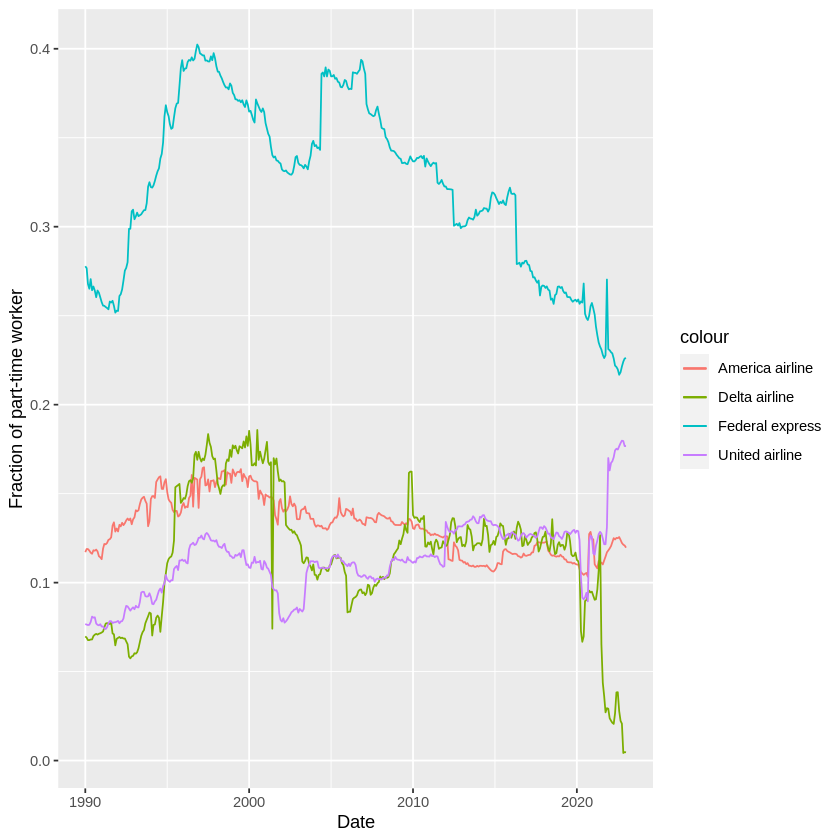

In [8]:
merged_tibble |>
    ggplot() +
    geom_line(aes(x=Date, y=Part_time_america/Grand_total_america, colour='America airline')) +
    geom_line(aes(x=Date, y=Part_time_delta/Grand_total_delta, colour='Delta airline')) +
    geom_line(aes(x=Date, y=Part_time_federal/Grand_total_federal, colour='Federal express')) +
    geom_line(aes(x=Date, y=Part_time_united/Grand_total_united, colour='United airline')) +
    labs(x='Date', y='Fraction of part-time worker') 

## 6) did the COVID-19 pandemic have any influence in the employed workers of the airline companies ? Can you see a trend in the years 2019-2023 ?

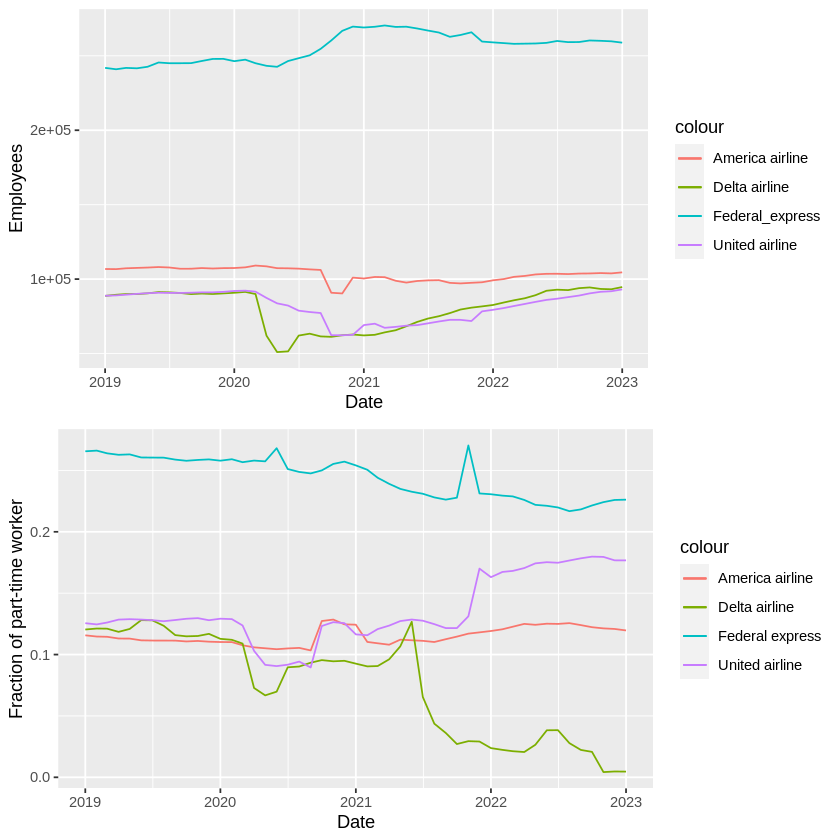

In [9]:
merged_tibble |>
    filter(Year > 2018) |>
    ggplot()+
    geom_line(aes(x=Date, y=Grand_total_america, colour='America airline')) +
    geom_line(aes(x=Date, y=Grand_total_delta, colour='Delta airline')) +
    geom_line(aes(x=Date, y=Grand_total_federal, colour='Federal_express'))+
    geom_line(aes(x=Date, y=Grand_total_united, colour='United airline'))+
    labs(x='Date', y='Employees') -> total

merged_tibble |>
    filter(Year > 2018) |>
    ggplot() +
    geom_line(aes(x=Date, y=Part_time_america/Grand_total_america, colour='America airline')) +
    geom_line(aes(x=Date, y=Part_time_delta/Grand_total_delta, colour='Delta airline')) +
    geom_line(aes(x=Date, y=Part_time_federal/Grand_total_federal, colour='Federal express')) +
    geom_line(aes(x=Date, y=Part_time_united/Grand_total_united, colour='United airline')) +
    labs(x='Date', y='Fraction of part-time worker') -> frac

grid.arrange(total, frac, ncol = 1, nrow = 2)

For America Delta and United airline the covid pandemic period (2019-2023) is characterized by a decrease in the total number of employees. Federal express does not show this trend. The part-time fraction of employees does show the decreasing trend for Delta and Federal, but for Federal this does not seemes to be related to the covid pandemic since the decrease has begun in 2005.

# EX.2 Data Frames and Tibble

In [10]:
install.packages('nycflights13')
library(nycflights13)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [11]:
flights

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1      2013 1     1   517      515             2         830      819          
2      2013 1     1   533      529             4         850      830          
3      2013 1     1   542      540             2         923      850          
4      2013 1     1   544      545            -1        1004     1022          
5      2013 1     1   554      600            -6         812      837          
6      2013 1     1   554      558            -4         740      728          
7      2013 1     1   555      600            -5         913      854          
8      2013 1     1   557      600            -3         709      723          
9      2013 1     1   557      600            -3         838      846          
10     2013 1     1   558      600            -2         753      745          
11     2013 1     1   558      600            -2         849      851          
12     2013 1     1   558      600            -2         853      856          
13     2013 1     1   558      600            -2         924      917          
14     2013 1     1   558      600            -2         923      937          
15     2013 1     1   559      600            -1         941      910          
16     2013 1     1   559      559             0         702      706          
17     2013 1     1   559      600            -1         854      902          
18     2013 1     1   600      600             0         851      858          
19     2013 1     1   600      600             0         837      825          
20     2013 1     1   601      600             1         844      850          
21     2013 1     1   602      610            -8         812      820          
22     2013 1     1   602      605            -3         821      805          
23     2013 1     1   606      610            -4         858      910          
24     2013 1     1   606      610            -4         837      845          
25     2013 1     1   607      607             0         858      915          
26     2013 1     1   608      600             8         807      735          
27     2013 1     1   611      600            11         945      931          
28     2013 1     1   613      610             3         925      921          
29     2013 1     1   615      615             0        1039     1100          
30     2013 1     1   615      615             0         833      842          
⋮      ⋮    ⋮     ⋮   ⋮        ⋮              ⋮         ⋮        ⋮             
336747 2013 9     30  2123     2125            -2       2223     2247          
336748 2013 9     30  2127     2129            -2       2314     2323          
336749 2013 9     30  2128     2130            -2       2328     2359          
336750 2013 9     30  2129     2059            30       2230     2232          
336751 2013 9     30  2131     2140            -9       2225     2255          
336752 2013 9     30  2140     2140             0         10       40          
336753 2013 9     30  2142     2129            13       2250     2239          
336754 2013 9     30  2145     2145             0        115      140          
336755 2013 9     30  2147     2137            10         30       27          
336756 2013 9     30  2149     2156            -7       2245     2308          
336757 2013 9     30  2150     2159            -9       2250     2306          
336758 2013 9     30  2159     1845           194       2344     2030          
336759 2013 9     30  2203     2205            -2       2339     2331          
336760 2013 9     30  2207     2140            27       2257     2250          
336761 2013 9     30  2211     2059            72       2339     2242          
336762 2013 9     30  2231     2245           -14       2335     2356          
336763 2013 9     30  2233     2113            80        112       30          
336764 2013 9     30  2235     2001           154         59     2249          
336765 

## 1.1) Plot the total number of flights departed from each of the three NYC airports as a function of time (one entry for each of the 365 days of the year).

In [12]:
#add the column with the date as a single column
flights$date <- make_date(year=flights$year, month=flights$month, day=flights$day) 

#count the number of flight in the same day from the same airport
by_origin <- flights |> count(origin, date) 
colnames(by_origin)[3] = 'n_flights'

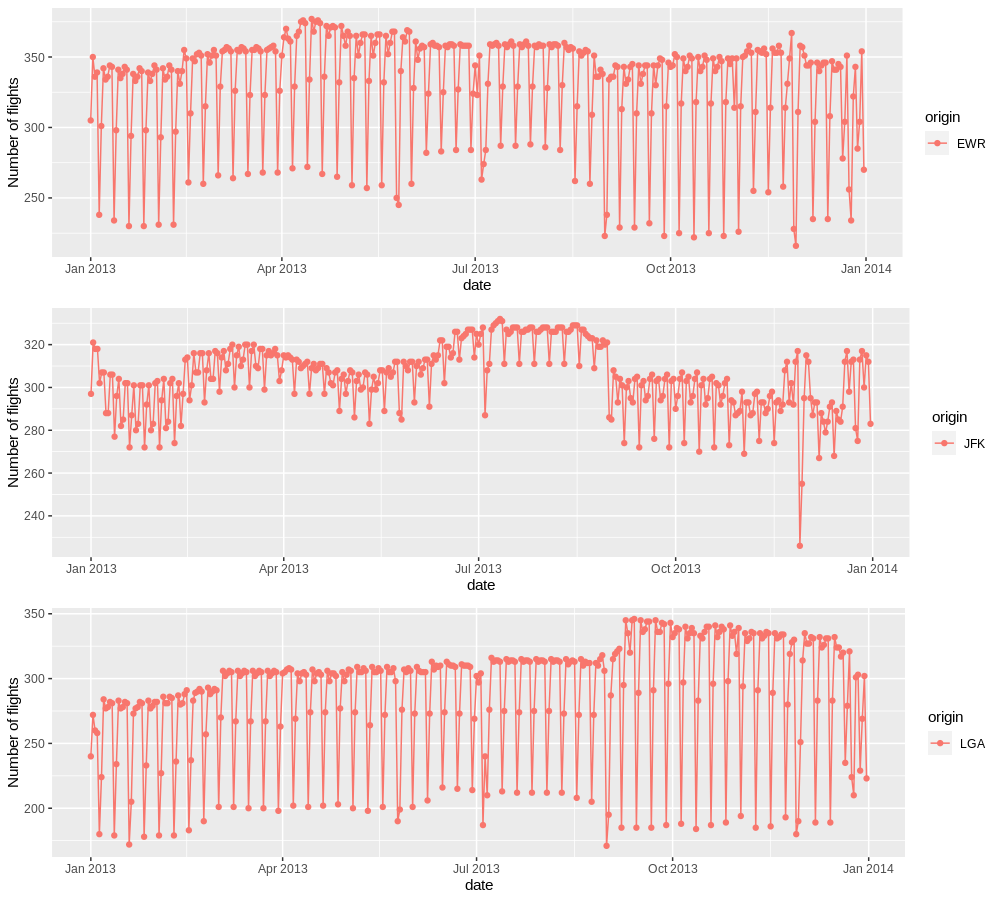

In [13]:
#plot 
by_origin |> 
        filter(origin=='JFK') |>
        ggplot() +
        geom_point(aes(x=date, y=n_flights, colour=origin)) +
        geom_line(aes(x=date, y=n_flights, colour=origin)) +
        labs(x='date', y='Number of flights') -> n_flights_JFK

by_origin |> 
        filter(origin=='EWR') |>
        ggplot() +
        geom_point(aes(x=date, y=n_flights, colour=origin)) +
        geom_line(aes(x=date, y=n_flights, colour=origin))  +
        labs(x='date', y='Number of flights') -> n_flights_EWR

by_origin |> 
        filter(origin=='LGA') |>
        ggplot() +
        geom_point(aes(x=date, y=n_flights, colour=origin)) +
        geom_line(aes(x=date, y=n_flights, colour=origin)) +
        labs(x='date', y='Number of flights') -> n_flights_LGA

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100) 
grid.arrange(n_flights_EWR, n_flights_JFK, n_flights_LGA, nrow=3)

## 1.2) Plot the average number of flights computed over the first five working days of each week as a function of the week number of the year. Produce the same plot for the flights departing over the weekend (Saturdays and Sundays)

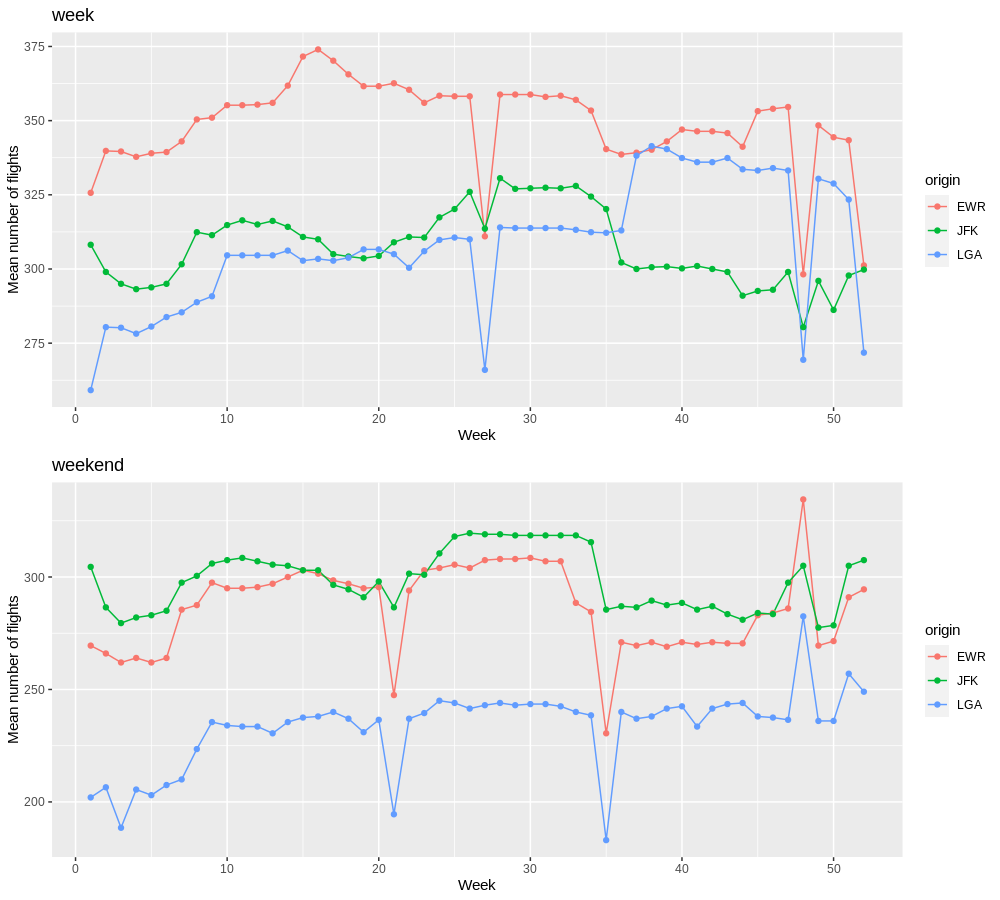

In [14]:
by_origin$week_day <-  wday(by_origin$date, week_start = 1)
by_origin$week_number <- isoweek(by_origin$date)

week_flights <- by_origin |>
                filter(week_day < 6) |>
                group_by(week_number, origin) |>
                summarize(mean_flights = mean(n_flights), .groups='drop') |>
                ggplot() +
                geom_line(aes(x=week_number, y=mean_flights, colour=origin)) +
                geom_point(aes(x=week_number, y=mean_flights, colour=origin)) +
                labs(x='Week', y='Mean number of flights', title='week')

weekend_flights <- by_origin |>
                filter(week_day > 5) |> 
                group_by(week_number, origin) |>
                summarize(average_flights = mean(n_flights), .groups = 'drop') |>
                ggplot() +
                geom_line(aes(x=week_number, y=average_flights, colour=origin)) +
                geom_point(aes(x=week_number, y=average_flights, colour=origin)) +
                labs(x='Week', y='Mean number of flights', title='weekend')

grid.arrange(week_flights,weekend_flights, ncol = 1, nrow = 2, heights=c(10,10))

## 2.1) For each flight in the data frame, compute the departure delay1 and extract the following pieces of information (separately for each NYC airport): - min, max and average delay for each day of the year (show the data in corresponding plots)

### Minimum delay for each day

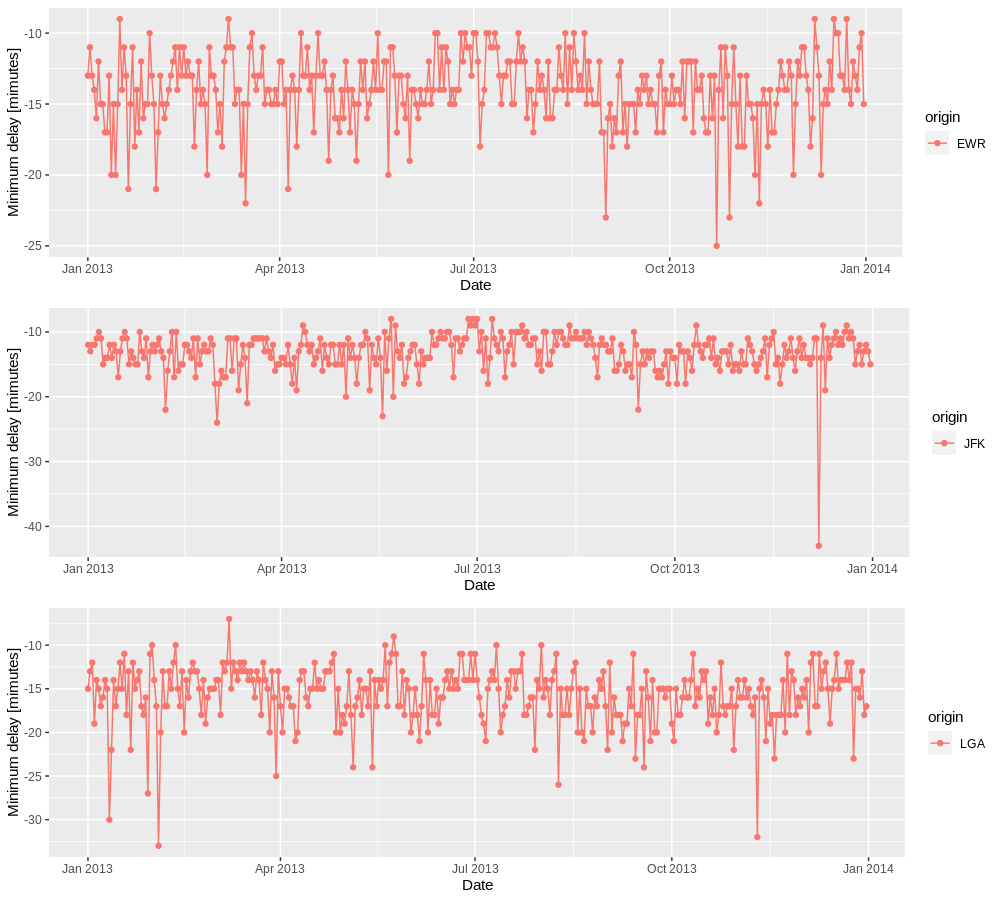

In [17]:
for (i in c('JFK', 'EWR', 'LGA')){
    if (i=='JFK'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(min_delay = min(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=min_delay, colour=origin))+
            geom_line(aes(x=date, y=min_delay, colour=origin)) +                    
            labs(x='Date', y='Minimum delay [mimutes]') -> min_delay_JFK
        
    } else if(i=='EWR'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(min_delay = min(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=min_delay, colour=origin))+
            geom_line(aes(x=date, y=min_delay, colour=origin)) +                    
            labs(x='Date', y='Minimum delay [mimutes]') -> min_delay_EWR
        
    } else if (i=='LGA'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(min_delay = min(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=min_delay, colour=origin))+
            geom_line(aes(x=date, y=min_delay, colour=origin)) +                    
            labs(x='Date', y='Minimum delay [mimutes]') -> min_delay_LGA
    }
}
#options(repr.plot.width = 15, repr.plot.height = 4, repr.plot.res = 100) 
grid.arrange(min_delay_EWR, min_delay_JFK, min_delay_LGA, nrow = 3)

### Maximum delay for each day

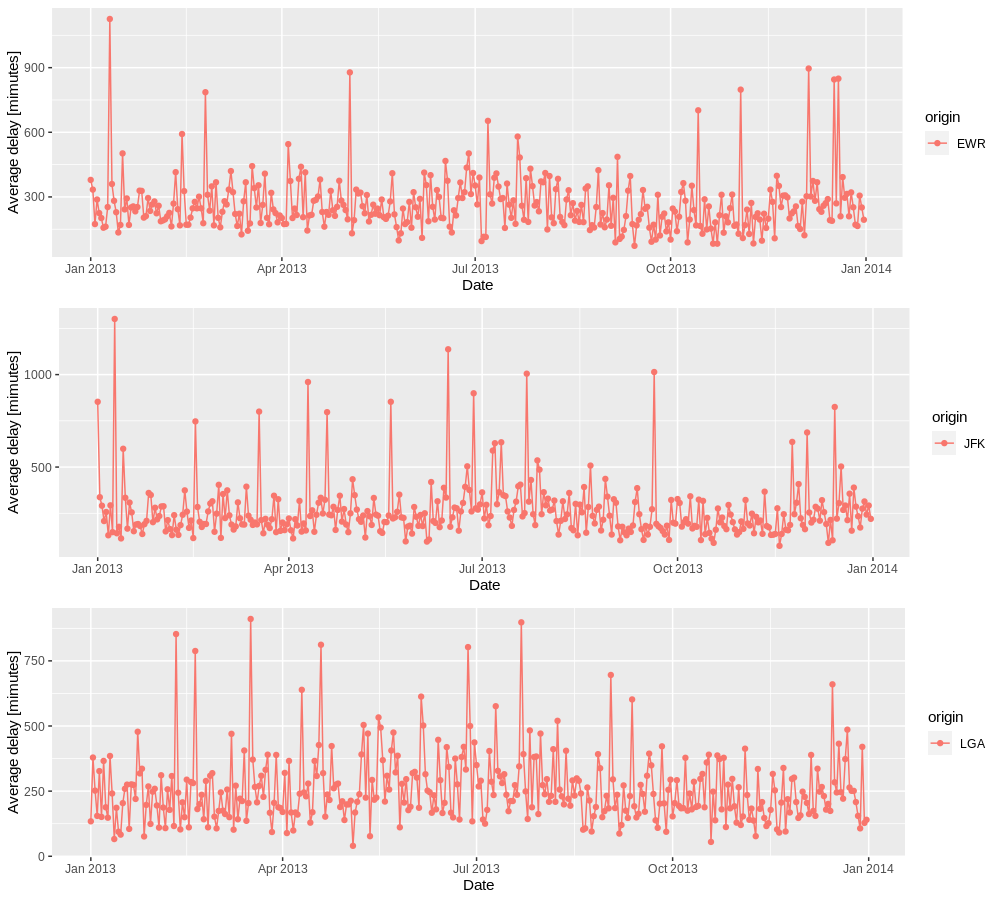

In [18]:
for (i in c('JFK', 'EWR', 'LGA')){
    if (i=='JFK'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(max_delay = max(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=max_delay, colour=origin))+
            geom_line(aes(x=date, y=max_delay, colour=origin)) +                    
            labs(x='Date', y='Average delay [mimutes]') -> max_delay_JFK
        
    } else if(i=='EWR'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(max_delay = max(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=max_delay, colour=origin))+
            geom_line(aes(x=date, y=max_delay, colour=origin)) +                    
            labs(x='Date', y='Average delay [mimutes]') -> max_delay_EWR
        
    } else if (i=='LGA'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(max_delay = max(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=max_delay, colour=origin))+
            geom_line(aes(x=date, y=max_delay, colour=origin)) +                    
            labs(x='Date', y='Average delay [mimutes]') -> max_delay_LGA
    }
}
#options(repr.plot.width = 22, repr.plot.height = 5, repr.plot.res = 100) 
grid.arrange(max_delay_EWR, max_delay_JFK, max_delay_LGA, nrow=3)

### Average delay 

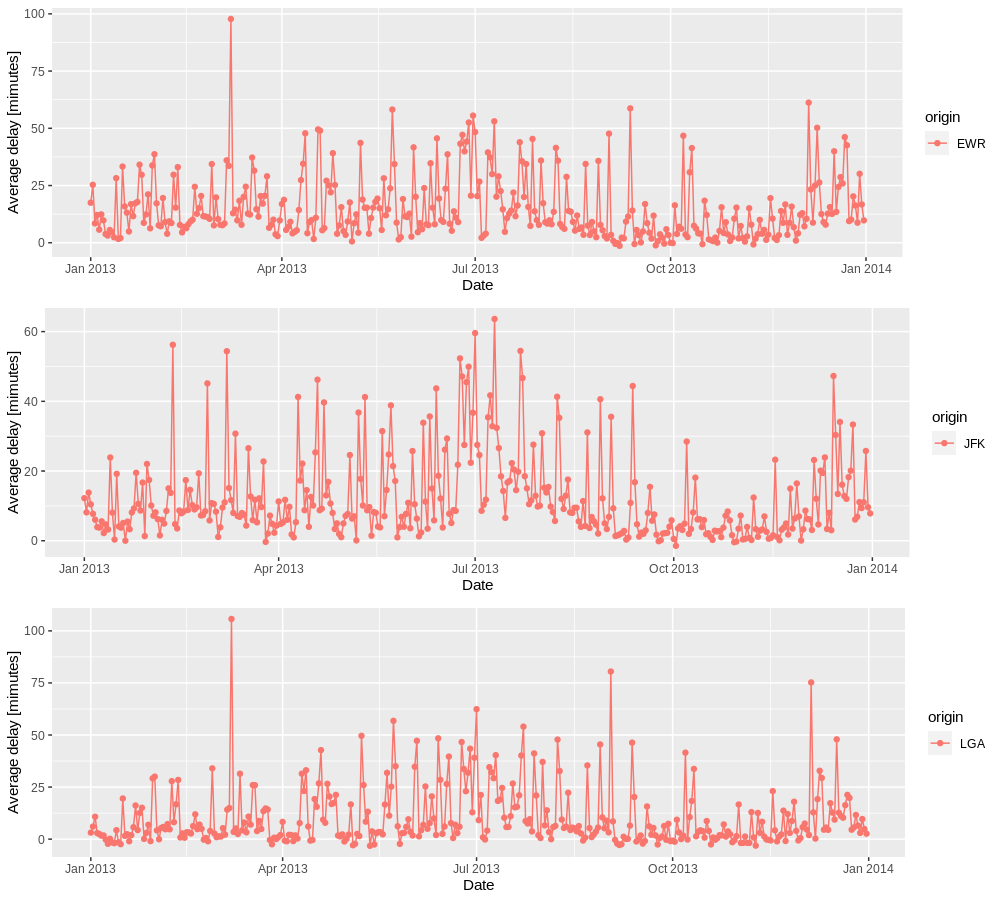

In [19]:
for (i in c('JFK', 'EWR', 'LGA')){
    if (i=='JFK'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(average_delay = mean(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=average_delay, colour=origin))+
            geom_line(aes(x=date, y=average_delay, colour=origin)) +                    
            labs(x='Date', y='Average delay [mimutes]') -> average_delay_JFK
        
    } else if(i=='EWR'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(average_delay = mean(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=average_delay, colour=origin))+
            geom_line(aes(x=date, y=average_delay, colour=origin)) +                    
            labs(x='Date', y='Average delay [mimutes]') -> average_delay_EWR
        
    } else if (i=='LGA'){
        flights |>
            drop_na(dep_delay) |>
            filter(origin==i) |>
            group_by(origin, date) |>
            summarize(average_delay = mean(dep_delay), .groups = 'drop') |>
            ggplot() +
            geom_point(aes(x=date, y=average_delay, colour=origin))+
            geom_line(aes(x=date, y=average_delay, colour=origin)) +                    
            labs(x='Date', y='Average delay [mimutes]') -> average_delay_LGA
    }
}
#options(repr.plot.width = 22, repr.plot.height = 5, repr.plot.res = 100) 
grid.arrange(average_delay_EWR, average_delay_JFK, average_delay_LGA, nrow=3)

## 3) Assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year 

* air_time is in minutes
* distance is in mile (those savages) -> 1 mile ~ 1.61 km

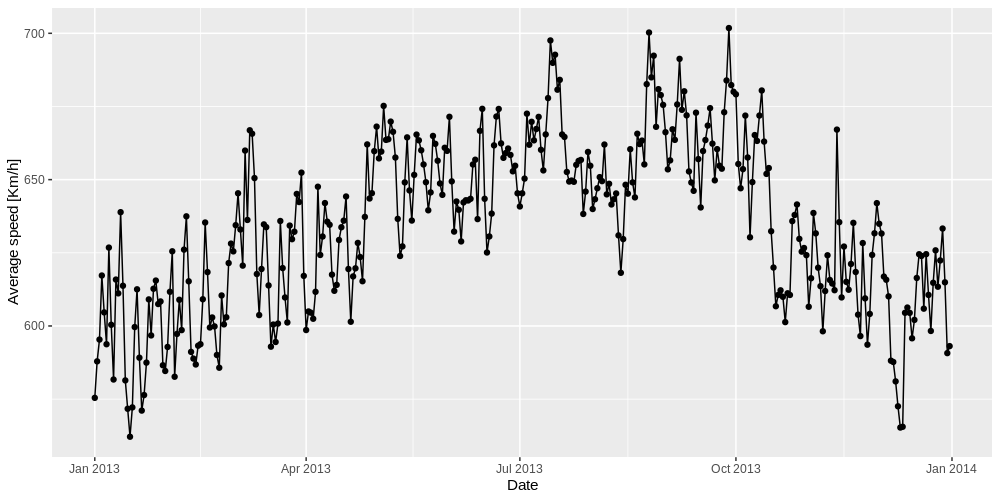

In [20]:
flights |>
    drop_na(air_time) |>
    group_by(date) |>
    summarize(average_speed = mean((distance*1.61)/(air_time/60))) |>
    ggplot() +
    geom_point(aes(x=date, y=average_speed)) + 
    geom_line(aes(x=date, y=average_speed)) +
    labs(x='Date', y='Average speed [Km/h]')-> average_speed

options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 100) 
average_speed

#if i need the column with the speed
# flights$speed <- (flights$distance*1.61)/(flights$air_time/60)
# flights |>
#     drop_na(air_time) |>
#     group_by(date) |>
#     summarize(average_speed = mean(speed) |>
#     ggplot() +
#     geom_point(aes(x=date, y=average_speed)) +
#     labs()

## 4) Analyze the flights offered by each airline company and determine:
- the airline companies offering the largest two numbers of flights per day and per week;
- the airline company offering the smallest number of flight per month;
- the airline company offering the longest distance flight per month.
- (you can produce plots, if you like, to visualize the results of the analysis)

### The airline companies offering the largest two numbers of flights per day and week

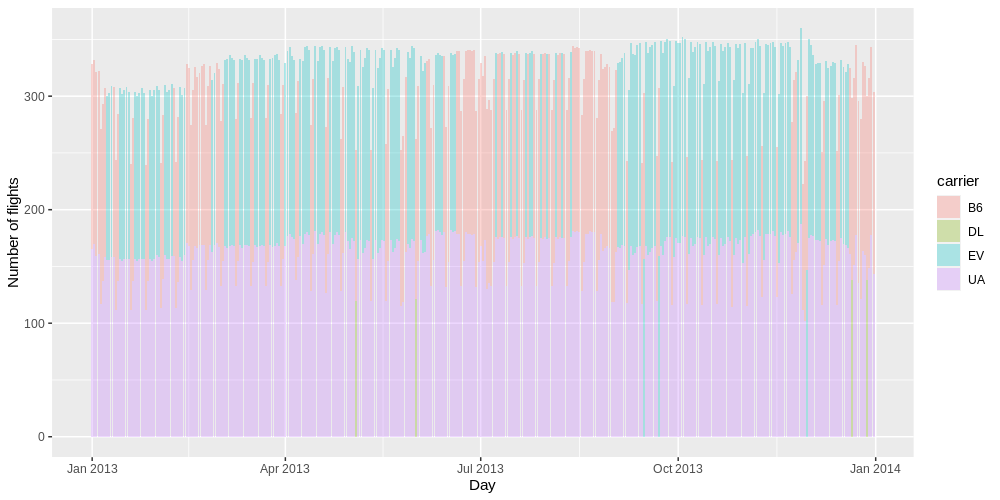

In [21]:
flights |>
    group_by(date) |>
    count(carrier, date) |>
    slice_max(n, n=2, with_ties = FALSE) |> 
    ggplot(aes(x=date, fill=carrier, y=n))+
    geom_bar(position = "stack",stat="identity", alpha=.3) +
    labs(x='Day',y='Number of flights')

options(repr.plot.width = 14, repr.plot.height = 5) 

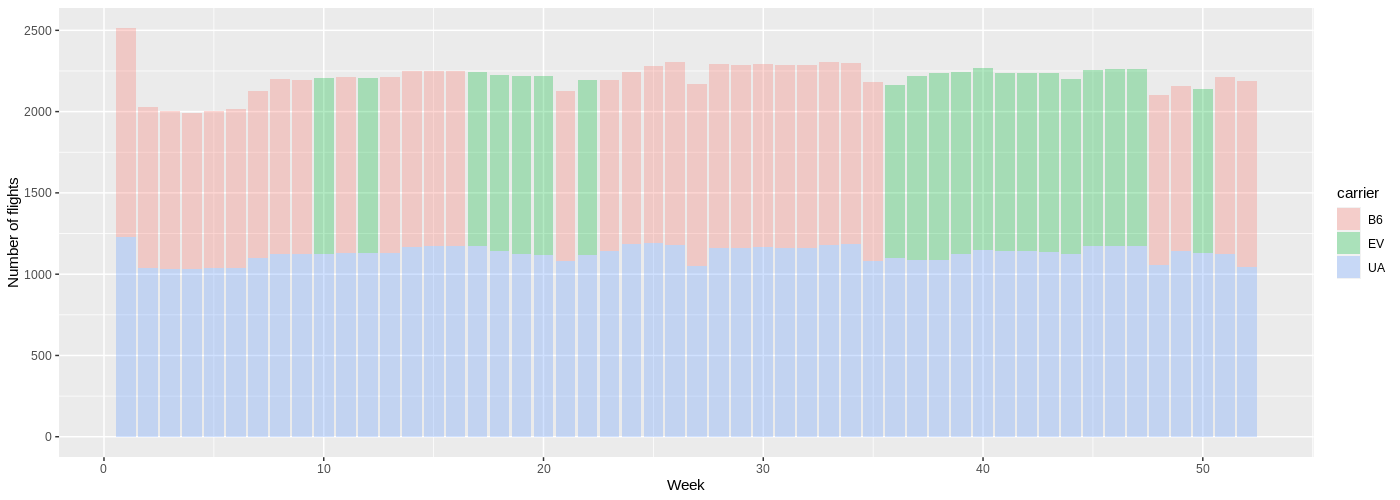

In [22]:
flights$week_number <- isoweek(flights$date)
flights |>
    group_by(week_number) |>
    count(carrier, week_number) |>
    slice_max(n, n=2, with_ties = FALSE) |> 
    ggplot(aes(x=week_number, fill=carrier, y=n))+
    geom_bar(position = "stack",stat="identity", alpha=.3) +
    labs(x='Week',y='Number of flights')

options(repr.plot.width = 14, repr.plot.height = 5) 

### The airline company offering the smallest number of flight per month

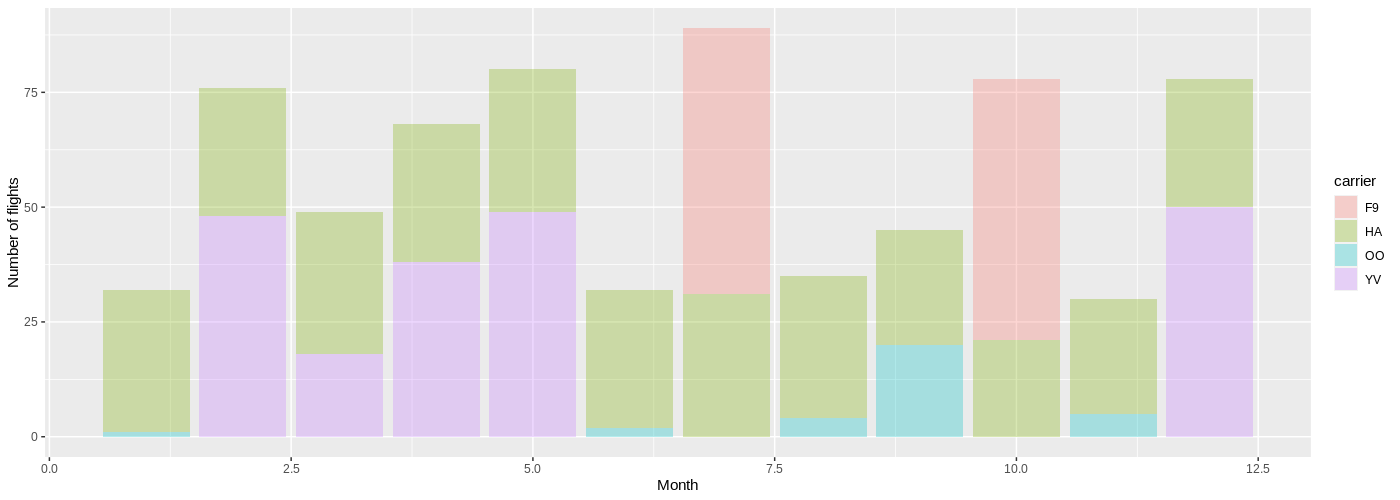

In [23]:
flights |> 
    group_by(month)|>
    count(month, carrier) |>
    slice_min(n, n=2, with_ties = FALSE) |>
    ggplot(aes(x=month, fill=carrier, y=n))+
    geom_bar(position='stack', stat='identity', alpha=.3) +
    labs(x='Month', y='Number of flights')
    

### The airline company offering the longest distance flight per month.


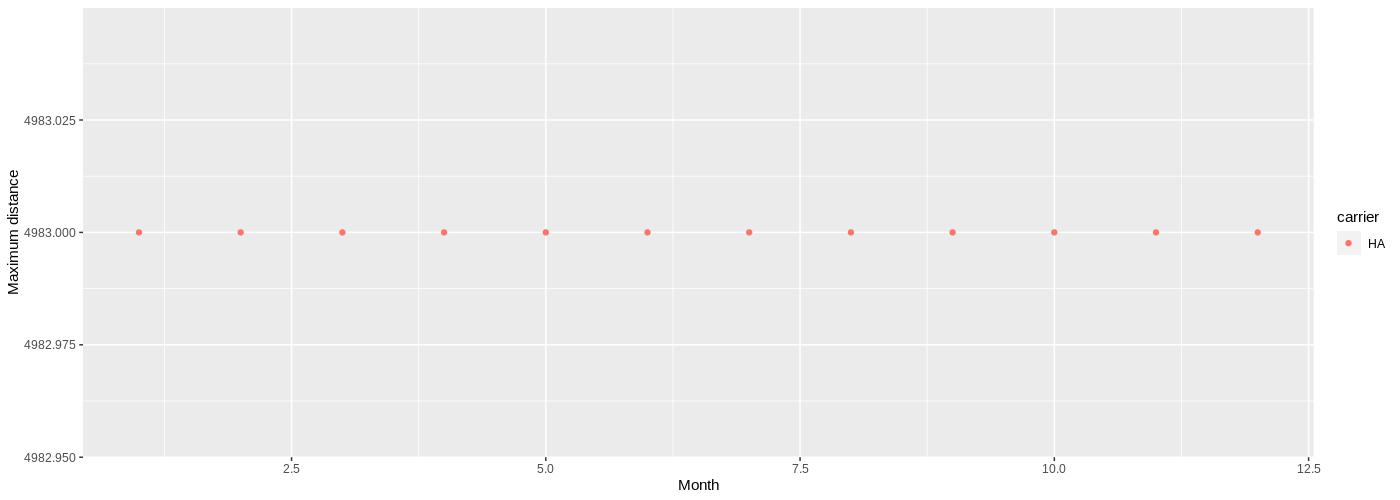

In [24]:
flights |>
    group_by(month, carrier) |>
    summarize(n=max(distance), .groups='drop') |>
    slice_max(n, n=1) |>
    ggplot() +
    geom_point(aes(x=month, y=n, colour=carrier)) +
    labs(x='Month', y='Maximum distance')